# Machine Learning o Aprendizaje automático
* El aprendizaje automático puede considerarse una subrama de la inteligencia artificial, que permiten a las computadoras aprendan y por lo tanto comportarse de manera más inteligente mediante un conjunto de datos de entrada que entrenan los modelos

## Intel oneAPI y ML
* Intel® [oneAPI Base Toolkit](https://software.intel.com/content/www/us/en/develop/tools/oneapi/base-toolkit.html)
    * Incluye Intel® oneAPI Deep Neural Network Library (oneDNN), Intel® oneAPI Data Analytics Library (oneDAL)
    * Optimizaciones para algoritmos y frameworks 
* Intel® [oneAPI AI Analytics Toolkit](https://software.intel.com/content/www/us/en/develop/tools/oneapi/ai-analytics-toolkit.html)
    * Acelera ML \& Data Science (DL)
        * High-performance Python 
        * Extensiones como "[Intel® Extension for Scikit-learn"](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd)
        
### Scikit-learn
*  "[Intel® Extension for Scikit-learn"](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd) permite acelerar la librería [scikit-learn](https://scikit-learn.org/stable/)  para análisis de datos y aprendizaje automático

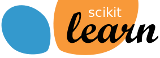

* Scikit-learn (a menudo denominado **sklearn**) es un módulo de Python para el aprendizaje automático
* La extensión [Intel® Extension para Scikit-learn](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd) acelera aplicaciones basadas en scikit-learn para CPU y GPU
    * Este paquete permite ser parcheado dinámicamente mejorando el rendimiento de sus algoritmos de ML

#### Como funciona
* Usando scikit-learn con esta extensión, puede:
    * Acelerar el entrenamiento y la inferencia hasta 100 veces según el algoritmo seleccionado
    * Permite seguir usando la API scikit-learn puesto que se basa en la librería de código abierto
    * El parcheo permite habilitar/deshabilitar la extensión con un par de líneas de código o también en la línea de comandos
* Tanto [scikit-learn](https://scikit-learn.org/stable/) como [Intel Extension for Scikit-learn](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd) son parte del conjunto completo de recursos y herramientas de desarrollo de inteligencia artificial y aprendizaje automático optimizado por Intel®



#### Aceleraciones
* La última de la librería *scikit-learn-intelex-2021.2.X* de la [Intel® Extension for Scikit-learn](https://www.anaconda.com/blog/scikit-learn-speed-up-with-intel-and-anaconda) permite alcanzar aceleraciones importantes según el tipo de modelo utilizado, tanto en la fase de **entrenamiento**, como en la fase de **inferencia**
* A lo largo del cuaderno de Jupyter vamos a mostrar como poder utilizar dicha librería para alcanzar estas aceleraciones

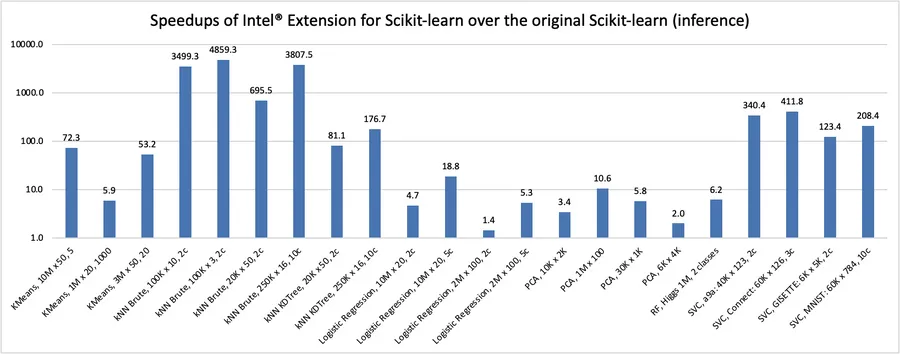

# Funcionamiento
* Intel Extension para Scikit-learn proporciona una forma de acelerar el código scikit-learn
    * En un código existente, importaremos **sklearnex**: nombre de la biblioteca de python para el Extensión Intel
    * Usando "**patching**": los algoritmos de scikit-learn son intercambiadas por la versión optimizada de Intel
    * Varias maneras:
        * Sin editar el código: invocando *python* con un flag adicional
        * Modificando el código: importando e invocando a las funciones de sklearnex
        * Añadiendo parches: sin modificar el resto del código

## Línea de comandos
```bash
python -m sklearnex my_application.py
```

## Código parcheado
* Dentro del script o el cuaderno de Jupyter, **parcheando** el código
```python
from sklearnex import patch_sklearn
patch_sklearn()
```

* Inhabilitando el parche
```python
from sklearnex import unpatch_sklearn
unpatch_sklearn()
```

# Ejercicio: comparación de clasificación usando Intel Extension for Scikit-learn 
## Objetivos
* Comparación de los tiempos de ejecución de un algortimo de clasificación como **kmeans** haciendo uso de [Intel Extension for Scikit-learn](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd) y un modelo de clasificación mediante activación de parches con ```patch_sklean()```

* A continuación, aplicaremos Intel Extension for Scikit learn a un caso de uso en una CPU

* La extensión Intel® para Scikit-learn contiene una funcionalidad de reemplazo directo para el paquete de scikit-learn estándar de una distribución **python**
    * Puede aprovechar las optimizaciones de rendimiento de Intel Extension para Scikit-learn agregando solo dos líneas de código antes de las importaciones habituales de scikit-learn
    * La aplicación de parches Intel® Extension para Scikit-learn afecta el rendimiento de la funcionalidad específica de Scikit-learn

### Dataset
* Datos: [covtype](https://archive.ics.uci.edu/dataset/31/covertype)
* Usaremos un conjunto de datos de cobertura forestal conocido como **covtype** diposible dentro del conjunto de datos para testeo disponible dentro de la propia librería de sklearn mediante la importación de ```sklearn.datasets```
     * Estaremos prediciendo el tipo de cubierta forestal a partir de variables cartográficas únicamente (sin datos de detección remota)
     * La celda que determina la cubierta forestal para una observación determinada es de 30 x 30 metros
     * Los datos están en forma cruda (sin reescalar) y contienen valores binarios (0 o 1) que determinan si la celda contiene **áreas silvestres** y **tipos de suelo**
     * Datos procedentes del Bosque Nacional Roosevelt del norte de Colorado
     
### Descripción general del procedimiento
* En el siguiente ejemplo, entrenaremos el modelo kNN mediante [Intel Extension para Scikit-learn](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.2glchd) para el conjunto de datos de **covtype**
* Calcularemos la CPU para la fase de entrenamiento y la predicción
* Evaluaremos la ganancia habilitando/deshabilitando la **Intel Extension para Scikit-learn** con el parche de la extensión Intel para Scikit-learn


## (1) Preparación del dataset
1. El siguiente fragmento de código busca el dataset con las líneas

```from  sklearn.datasets import fetch_covtype```

```x, y = fetch_covtype(return_X_y=True)```


2. Divide el dataset en dos partes para realizar la fase del training (80%) y del testing

```x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)```


In [ ]:
# Copyright 2022 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import time

#from  sklearn.datasets import fetch_covtype
#x, y = fetch_covtype(return_X_y=True)

# Load data from CSV de datos
data = pd.read_csv('datasets/covtype.csv') 

x_data = data.iloc[:,:-1]   # Remove last colum that corresponds to target
y_data = data['Cover_Type'] # Target

x = x_data.to_numpy()
y = y_data.to_numpy()

# Data Set Information:
# Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).
# This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

# for sake of time is 1/4th of the data
subset = x.shape[0]//4
x = x[:subset,:]
y = y[:subset]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

# set up KNN algorithm parameters
# 'n_neighbors': 40,  
#     regulates how many neighbors should be checked when an item is being classified
# 'weights': 'distance',
#     signifies how weight should be distributed between neighbor values.
#     This value will cause weights to be distributed based on their distance (inversely correlated). Closer neighbors will have a higher weight in the algorithm.
# 'n_jobs': -1
#     Signifies the parallel jobs to be allowed at the same time for neighbor algorithm
params = {
    'n_neighbors': 40,  
    'weights': 'distance',  
    'n_jobs': -1
}
print('dataset shape: ', x.shape)

In [ ]:
print('dataset training shape: ', x_train.shape)

## (2) Aplicación del parche
3. Use este fragmento de código que se indica a continuación para habilitar el parche

```from sklearnex import patch_sklearn, unpatch_sklearn```

```patch_sklearn()```

4. Entrenamiento del modelo kNN mediante la invocación ```knn = KNeighborsClassifier(**params).fit(x_train, y_train) ```
5. Inferencia con los datos para el test *x_test* con el comando ```predicted = knn.predict(x_test)```

In [ ]:
# Copyright 2022 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


################# Insert Patch here ####################################
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
########################################################################


from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier(**params).fit(x_train, y_train)
predicted = knn.predict(x_test)
patched_time = time.time() - start_time
print("Time to calculate \033[1m knn.predict in Patched scikit-learn {:4.1f}\033[0m seconds".format(patched_time))

report = metrics.classification_report(y_test, predicted)
print(f"Classification report for kNN:\n{report}\n")

## (3) Deshabilitación del parche
6. Usar el siguiente fragmento de código para deshabilitar el parche

```from sklearnex import unpatch_sklearn```
```unpatch_sklearn()```

In [ ]:
# Copyright 2022 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#########################################
#
# Insert unpatch code here
from sklearnex import unpatch_sklearn
unpatch_sklearn()
#
#########################################

# same code used to predict as from above cell - but this one is UNPATCHED
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier(**params).fit(x_train, y_train)
predicted = knn.predict(x_test)
unpatched_time = time.time() - start_time
print("Time to calculate \033[1m knn.predict in UNpatched scikit-learn {:4.1f}\033[0m seconds".format(unpatched_time))

report = metrics.classification_report(y_test, predicted)
print(f"Classification report for kNN:\n{report}\n")

## (4)  Dibujar las ganancias
7. Evaluar la aceleración

In [ ]:
# Copyright 2022 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
%matplotlib inline
import matplotlib.pyplot as plt

left = [1,2]
pred_times = [unpatched_time, patched_time]
tick_label = ['unpatched KNN', 'patched KNN']
plt.figure(figsize = (16,8))
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['red', 'blue'])
plt.xlabel('Predict Method'); plt.ylabel('time [s]'); plt.title('KNN Predict time [s] - Lower is better')
plt.show()

print('Intel(R) Extensions for scikit-learn* \033[1mKNN acceleration {:4.1f} x!\033[0m'.format( unpatched_time/patched_time))

# Funciones Optimizadas en Sklearnex 

* Intel ha creado una biblioteca funcionalmente equivalente y de mejor rendimiento que contiene versiones parcheadas de [32 algoritmos scikit-learn](https://intel.github.io/scikit-learn-intelex/algorithms.html)
* Para acceder a estos algoritmos optimizados que se actuivan como hemos visto mediante "parcheado" se necesita tener dispnible el kit de herramientas de IA de onaAPI [disponible en la extensión **Intel Extensions for scikit-learn**](https://intel.github.io/scikit-learn-intelex/installation.html)

## Comparativa
* Vamos a ver en el siguiente ejemplo una comparativa de rendimiento en CPU de los principales algoritmos soportados [en scikitex-learn](https://intel.github.io/scikit-learn-intelex/algorithms.html)

1. El siguiente código consiste en un apoyo para testear las comparaciones específicas según la elección de algoritmos/parámetros generados con datos sintéticos


In [1]:
from tqdm import tqdm  # progress bar
import time #so we can time the action
def comparison(cases):
    elapsed_fit = {}  # dictionary to track the time elapsed for the fit method
    elapsed_predict = {}  # dictionary to track the time elapsed for the predict/transform method 
    # the parmeters for this algorithms and for generating the data will be in the next cell
    for name, case in tqdm(cases.items()):
        algorithm = case['algorithm']
        estimator = algorithm['estimator'](**algorithm['params'])
        data = case['data']
        x, y = data['generator'](**data['params'])
        
        # Timing of fit and predict    
        start = time.time()
        estimator.fit(x, y)
        fit_time = time.time() - start
        start = time.time()
        if hasattr(estimator, 'predict'):
            estimator.predict(x)
        if hasattr(estimator, 'transform'):
            estimator.transform(x)            
        predict_time = time.time() - start
        
        elapsed_fit[name] = fit_time
        elapsed_predict[name] = predict_time
    return elapsed_fit, elapsed_predict

2. Creamos la función **get_cases** que devuelve un diccionario con parámetros tanto para del algoritmo a usar como los parámetros correspondientes a dataset sintético (tamaño del problema)

In [2]:
def get_cases():
    return {
    'SVC with Linear Kernel': {
        "algorithm": {
            'estimator': sklearn.svm.SVC,
            'params': {
                'C': 1.0,
                'kernel': 'linear',
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 20000,
                'n_features': 30,
                'n_classes': 3,
                'n_informative': 3,
                'random_state': 43,
            }
        }
    },
    'SVC with RBF Kernel': {
        "algorithm": {
            'estimator': sklearn.svm.SVC,
            'params': {
                'C': 1.0,
                'kernel': 'rbf',
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 25000,
                'n_features': 30,
                'n_classes': 5,
                'n_informative': 4,
                'random_state': 43,
            }
        }
    },
    'Logistic Regression': {
        "algorithm": {
            'estimator': sklearn.linear_model.LogisticRegression,
            'params': {
                'n_jobs': -1,
                'random_state': 43,
                'max_iter': 300
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 1000000,
                'n_features': 40,
                'n_classes': 10,
                'n_informative': 5,
                'random_state': 43,
            }
        }
    },
    'KNN Classifier': {
        "algorithm": {
            'estimator': sklearn.neighbors.KNeighborsClassifier,
            'params': {
                'n_jobs': -1,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 35000,
                'n_features': 30,
                'n_classes': 3,
                'n_informative': 3,
                'random_state': 43,
            }
        }
    },
    'KNN Regression': {
        "algorithm": {
            'estimator': sklearn.neighbors.KNeighborsRegressor,
            'params': {
                'n_neighbors': 10,
                'n_jobs': -1,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_regression,
            'params':
            {
                'n_samples': 35000,
                'n_features': 30,
                'random_state': 43,
            }
        }
    },
    'Linear Regression': {
        "algorithm": {
            'estimator': sklearn.linear_model.LinearRegression,
            'params': {
                'n_jobs': -1,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_regression,
            'params':
            {
                'n_samples': 3000000,
                'n_features': 100,
                'n_targets': 60,
                'random_state': 43,
            }
        }
    },     
    'Ridge Regression': {
        "algorithm": {
            'estimator': sklearn.linear_model.Ridge,
            'params': {
                'alpha':1.0
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 30000000,
                'n_features': 30,
                'n_classes': 3,
                'n_informative': 3,
                'random_state': 43,
            }
        }
    }, 
    'PCA': {
            "algorithm": {
            'estimator': sklearn.decomposition.PCA,
            'params': {
                'n_components': 25,
                'svd_solver': 'full',
                'random_state': 43,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_blobs,
            'params':
            {
#                 'n_samples': 3000000,
#                 'n_features': 100,
                'n_samples': 3000000,
                'n_features': 30,                
                'centers': 20,
                'random_state': 43,
            }
        }
    },   
}

3. Invocamos los algoritmos **sin optimizar** desactivando el parche

In [3]:
############## insert unpath lines below  ##################
from sklearnex import patch_sklearn, unpatch_sklearn
unpatch_sklearn() 
############################################################

import sklearn.svm, sklearn.datasets, sklearn.neighbors, sklearn.linear_model, sklearn.decomposition
cases = get_cases()  #case the algorithm/dataset pairs
sklearn_fit, sklearn_predict = comparison(cases)  # call the comparison function to captures the elapsed time dictionaries

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
 25%|████████████████████████████████▎                                                                                                | 2/8 [01:35<04:45, 47.54s/it]/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [10:12<00:00, 76.51s/it]


4. Repetimos el proceso pero seleccionando **la versión optimizada de los algoritmos de ML** activando el parche

In [4]:
#### insert code here ###########
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
#################################

import sklearn.svm, sklearn.datasets, sklearn.neighbors, sklearn.linear_model, sklearn.decomposition
cases = get_cases()
sklearnex_fit, sklearnex_predict = comparison(cases)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [05:18<00:00, 39.81s/it]


5. Por último dibujamos la comparativa

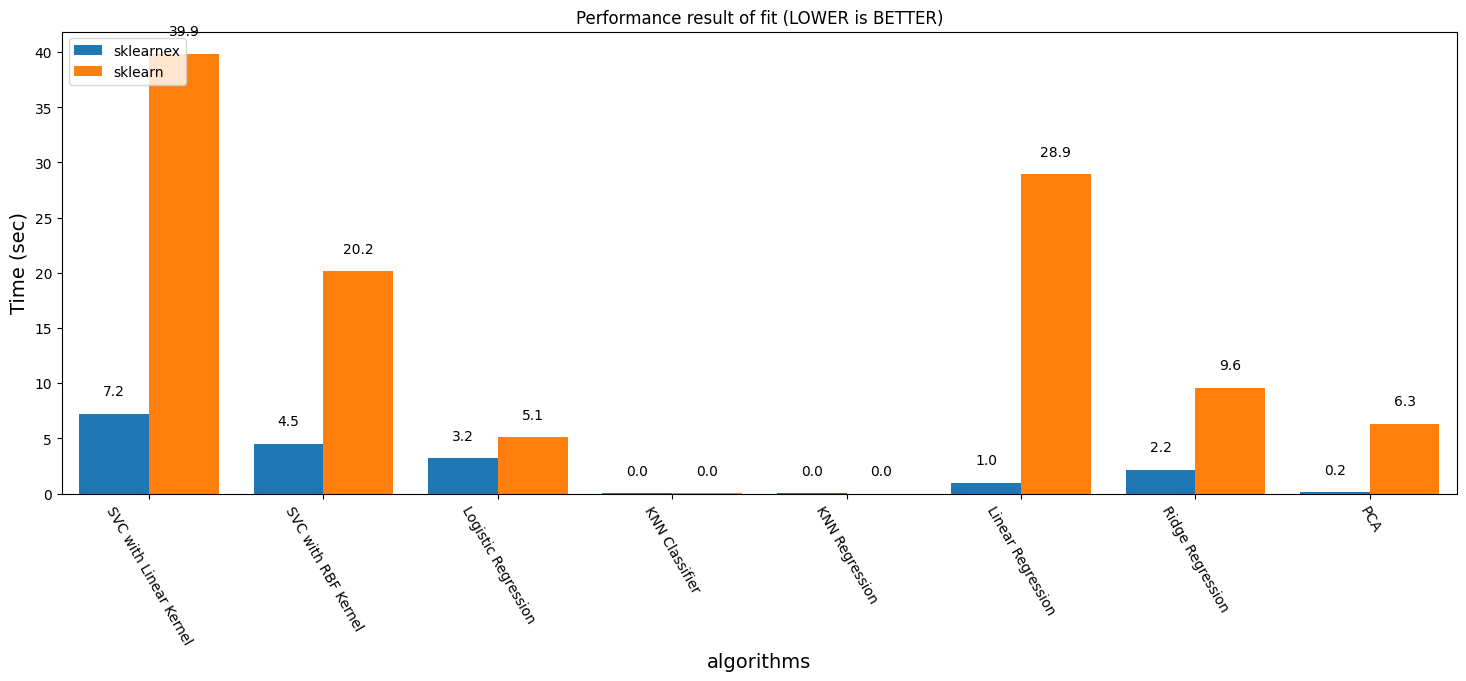

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

result = { name_sk: [time_ex, time_sk] for (name_sk, time_sk), 
          (name_ex, time_ex) in zip(sklearn_fit.items(), sklearnex_fit.items())}
result['Library'] = ['sklearnex', 'sklearn']
df_fit = pd.DataFrame(data=result).melt('Library', var_name='Algorithms', value_name='Time')

fig = plt.figure(figsize=(18, 6))
fig.patch.set_alpha(1)

plt.subplot(1, 1, 1)

barplot = sns.barplot(x='Algorithms', y='Time', hue='Library',
                      data=df_fit, errwidth = 2,
                      capsize = 0.05, saturation = 8,)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                     ha = 'center', va = 'center')

plt.legend(loc=2)
plt.ylabel("Time (sec)", size=14)
plt.xlabel("algorithms", size=14)
plt.title("Performance result of fit (LOWER is BETTER)")
plt.xticks(rotation = -60) # Rotates X-Axis Ticks by 60-degrees
plt.show()